In [24]:
# Load dependencies
from src import RelErrorTracker
import scipy.sparse.linalg as spla
import scipy.sparse as sp
import numpy as np
import scipy.io
import time
from matplotlib import pyplot as plt
import ilupp

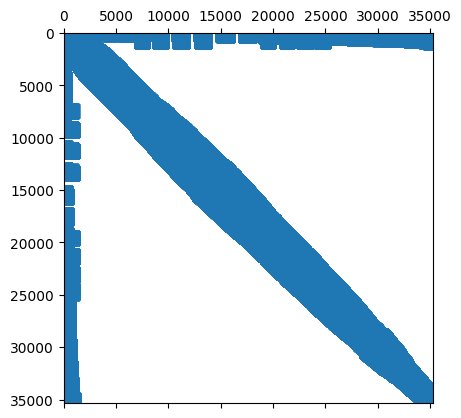

In [25]:
mat = scipy.io.loadmat('../data/cooling_flange.mat')
A = mat["A"]
b = np.random.rand(A.shape[0])
plt.spy(A)

### Linear (sparse) Solver:

In [26]:
t = time.time()
x_ls = spla.spsolve(A,b)
dt = time.time() - t
print(f"Computation time linear solver: {dt} seconds. Relative error: {np.linalg.norm(A*x_ls-b)/np.linalg.norm(b)}")

Computation time linear solver: 8.754602909088135 seconds. Relative error: 3.641500619823307e-12


### Regular Conjugate Gradient:

In [27]:
relerror = 1e-4

relerr_cg = RelErrorTracker(A,b)
t = time.time()
x_cg = spla.cg(A, b, tol = relerror, callback = relerr_cg.callback1)[0]
dt = time.time() - t
print(f"Computation time conjugate gradient: {dt} seconds. Relative error: {np.linalg.norm(A*x_cg-b)/np.linalg.norm(b)}")

Computation time conjugate gradient: 3.8068840503692627 seconds. Relative error: 9.93242914451537e-05


### PCG (M: diag)

In [28]:
relerr_pcgd = RelErrorTracker(A,b)

M = sp.diags(A.diagonal()**(-1))
t = time.time()
x_pcgd = spla.cg(A, b, tol = relerror, M = M, callback=relerr_pcgd.callback1)[0]
dt = time.time() - t
print(f"Computation time preconditioned conjugate gradient: {dt} seconds. Relative error: {np.linalg.norm(A*x_pcgd-b)/np.linalg.norm(b)}")

Computation time preconditioned conjugate gradient: 2.929717779159546 seconds. Relative error: 9.816745107559128e-05


### PCG (M: ichol)

In [29]:
relerr_pcgc = RelErrorTracker(A,b)

M = ilupp.IChol0Preconditioner(sp.csr_matrix(A))
t = time.time()
x_pcgc = spla.cg(A, b, tol = relerror, M = M, callback=relerr_pcgc.callback1)[0]
dt = time.time() - t
print(f"Computation time preconditioned conjugate gradient: {dt} seconds. Relative error: {np.linalg.norm(A*x_pcgc-b)/np.linalg.norm(b)}")

Computation time preconditioned conjugate gradient: 0.9705519676208496 seconds. Relative error: 9.322115395827464e-05


### Compare plots

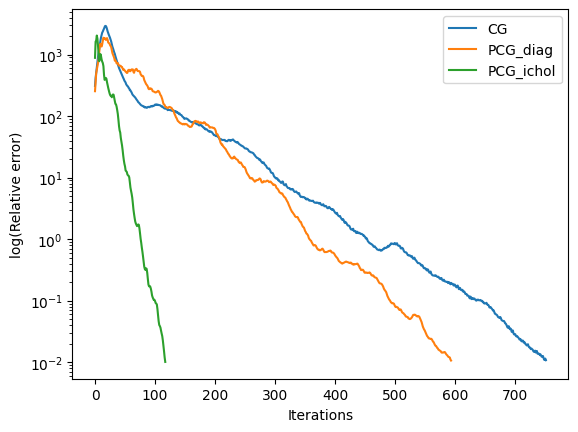

In [30]:
plt.semilogy(relerr_cg.norms)
plt.semilogy(relerr_pcgd.norms)
plt.semilogy(relerr_pcgc.norms)
plt.xlabel("Iterations")
plt.ylabel("log(Relative error)")
plt.legend(["CG","PCG_diag","PCG_ichol"])
plt.show()

### Part c

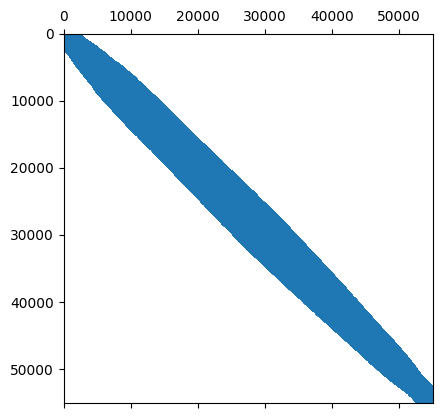

In [31]:
mat = scipy.io.loadmat('../data/convdiff.mat')
A = mat["A"]
b = np.random.rand(A.shape[0])
plt.spy(A)

### Linear (sparse) solver

In [17]:
# Linear solver:

t = time.time()
x = spla.spsolve(A,b)
dt = time.time() - t
print(f"Computation time linear solver: {dt} seconds. Relative error: {np.linalg.norm(A*x-b)/np.linalg.norm(b)}")

Computation time linear solver: 36.65418291091919 seconds. Relative error: 6.062867002578503e-12


Construct preconditioner ilu:

In [32]:
M = ilupp.ILUTPreconditioner(sp.csr_matrix(A))

In [33]:
relerr_gm = RelErrorTracker(A,b)

t = time.time()
x_gm = spla.gmres(A, b, tol = relerror, M=M, callback=relerr_gm.callback2, callback_type = "pr_norm")[0]
dt = time.time() - t
print(f"Computation time preconditioned gmres: {dt} seconds. Relative error: {np.linalg.norm(A*x_gm-b)/np.linalg.norm(b)}")


Computation time preconditioned gmres: 8.020793914794922 seconds. Relative error: 9.301189184314696e-05


#### GMRES without preconditioner:

In [20]:
relerr_gm_without = RelErrorTracker(A,b)

t = time.time()
x_gm_without = spla.gmres(A, b, tol = relerror, callback=relerr_gm_without.callback2, callback_type = "pr_norm")[0]
dt = time.time() - t
print(f"Computation time gmres: {dt} seconds. Relative error: {np.linalg.norm(A*x_gm_without-b)/np.linalg.norm(b)}")

KeyboardInterrupt: 

## Compare plots GMRES

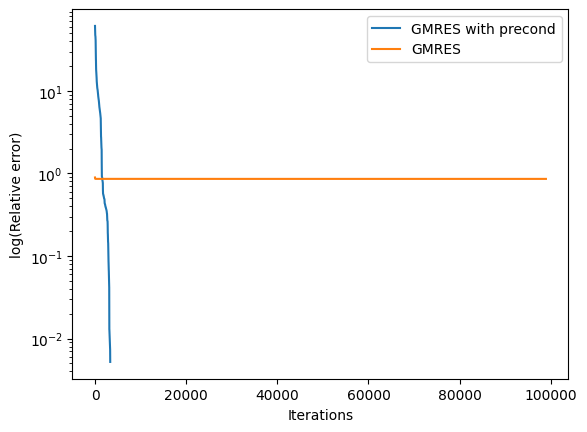

In [21]:
plt.semilogy(relerr_gm.norms)
plt.semilogy(relerr_gm_without.norms)
plt.xlabel("Iterations")
plt.ylabel("log(Relative error)")
plt.legend(["GMRES with precond","GMRES"])
plt.show()

### Using the package "ilupp"

In [22]:
t = time.time()
x_ilupp, info = ilupp.solve(sp.csr_matrix(A),b, info = True, rtol = relerror)
dt = time.time() - t
print(f"Computation time using ilupp: {dt} seconds. Relative error: {np.linalg.norm(A*x_ilupp-b)/np.linalg.norm(b)}")
print(f"ILUPP converged at {info[0]} iterations")

Computation time using ilupp: 1.147947072982788 seconds. Relative error: 1.6181436107151532e-07
ILUPP converged at 130 iterations
